# Transforming the RDS file into pandas DataFrame






In [1]:
!pip install rpy2

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

pandas2ri.activate()

# Load RDS file into pandas DataFrame
with robjects.conversion.localconverter(robjects.default_converter + pandas2ri.converter):
    df = robjects.r['readRDS']('O2_SingleSource.rds')

# Getting Familiar with the Data

In [3]:
import pandas as pd

In [4]:
df.head()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,Brand,alter
1:11,0.0,20.0,8.0,-1.0,0.0,0.0,1.0,160.0,KW 3/2016,PC_TKM_O2_,36.0
1:13,0.0,10.0,2.0,-1.0,0.0,0.0,3.0,45.0,KW 3/2016,PC_TKM_O2_,48.0
1:14,1.0,3.0,6.0,-1.0,0.0,0.0,3.0,75.0,KW 3/2016,PC_TKM_O2_,66.0
1:15,0.0,1.0,0.0,-1.0,0.0,0.0,4.0,15.0,KW 3/2016,PC_TKM_O2_,58.0
1:16,1.0,17.0,0.0,-1.0,0.0,0.0,3.0,82.0,KW 3/2016,PC_TKM_O2_,30.0


In [5]:
df.tail()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,Brand,alter
2:36200,0.0,1.0,1.0,1.0,2.0,1.0,1.0,233.0,KW 39/2017,PC_TKM_O2_,43.0
2:36201,0.0,114.0,2.0,2.0,4.0,2.0,69.0,64.0,KW 39/2017,PC_TKM_O2_,42.0
2:36202,1.0,138.0,2.0,2.0,4.0,2.0,2.0,75.0,KW 39/2017,PC_TKM_O2_,41.0
2:36203,0.0,1.0,1.0,1.0,2.0,1.0,1.0,236.0,KW 39/2017,PC_TKM_O2_,45.0
2:36204,0.0,87.0,2.0,3.0,4.0,2.0,3.0,128.0,KW 39/2017,PC_TKM_O2_,44.0


In [6]:
df.columns

Index(['WE', 'TV', 'Online', 'Mobile', 'Print', 'Plakat', 'Radio', 'PERS_GEW',
       'woche', 'Brand', 'alter'],
      dtype='object')

In [7]:
column_types = df.dtypes
column_types

WE           float64
TV           float64
Online       float64
Mobile       float64
Print        float64
Plakat       float64
Radio        float64
PERS_GEW     float64
woche       category
Brand         object
alter        float64
dtype: object

In [8]:
non_numeric_types = df.dtypes[df.dtypes == 'object']
non_numeric_types

Brand    object
dtype: object

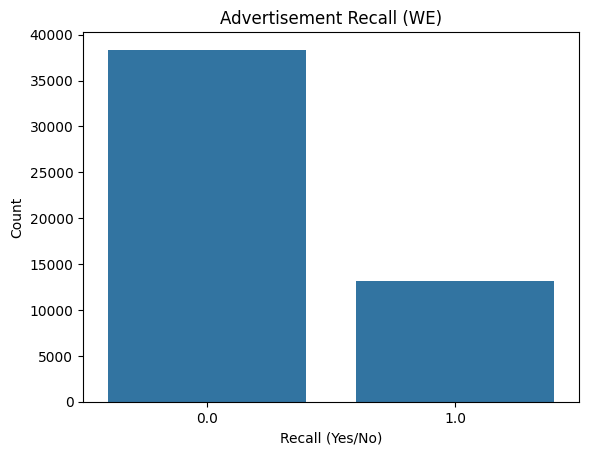

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create a count plot of the 'WE' column
sns.countplot(x='WE', data=df)
plt.title('Advertisement Recall (WE)')
plt.xlabel('Recall (Yes/No)')
plt.ylabel('Count')
plt.show()

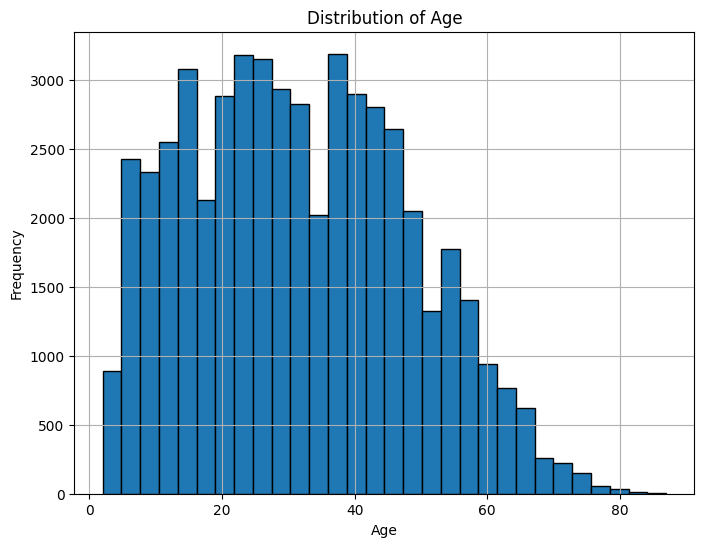

In [10]:
# Plot histogram of 'alter' column
plt.figure(figsize=(8, 6))
plt.hist(df['alter'], bins=30, edgecolor='k')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


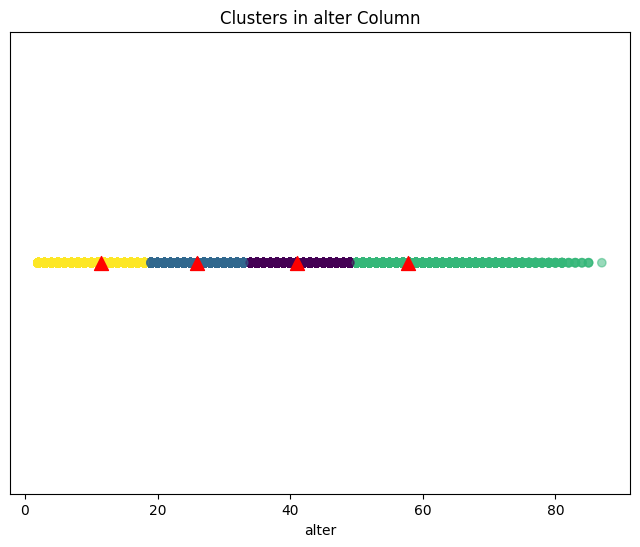

In [12]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape 'alter' column into a numpy array
alter_values = df['alter'].values.reshape(-1, 1)

# Initialize KMeans with the number of clusters you want to find
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans to the data
kmeans.fit(alter_values)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the labels of each data point
labels = kmeans.labels_

# Plot the data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(df['alter'], np.zeros_like(df['alter']), c=labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers, np.zeros_like(cluster_centers), marker='^', s=100, c='red')
plt.title('Clusters in alter Column')
plt.xlabel('alter')
plt.yticks([])
plt.show()


# **Data Preprocessing**


In [13]:
df_transformed = df.copy()

In [14]:
# Transforming the 'woche' column into a numeric (categorical) feature
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_transformed['woche'] = label_encoder.fit_transform(df_transformed['woche'])



In [15]:
df_transformed.head()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,Brand,alter
1:11,0.0,20.0,8.0,-1.0,0.0,0.0,1.0,160.0,40,PC_TKM_O2_,36.0
1:13,0.0,10.0,2.0,-1.0,0.0,0.0,3.0,45.0,40,PC_TKM_O2_,48.0
1:14,1.0,3.0,6.0,-1.0,0.0,0.0,3.0,75.0,40,PC_TKM_O2_,66.0
1:15,0.0,1.0,0.0,-1.0,0.0,0.0,4.0,15.0,40,PC_TKM_O2_,58.0
1:16,1.0,17.0,0.0,-1.0,0.0,0.0,3.0,82.0,40,PC_TKM_O2_,30.0


In [16]:
# Transform the 'Brand' column into a numeric feature
df_transformed['Brand'] = label_encoder.fit_transform(df_transformed['Brand'])

In [17]:
df_transformed

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,Brand,alter
1:11,0.0,20.0,8.0,-1.0,0.0,0.0,1.0,160.0,40,0,36.0
1:13,0.0,10.0,2.0,-1.0,0.0,0.0,3.0,45.0,40,0,48.0
1:14,1.0,3.0,6.0,-1.0,0.0,0.0,3.0,75.0,40,0,66.0
1:15,0.0,1.0,0.0,-1.0,0.0,0.0,4.0,15.0,40,0,58.0
1:16,1.0,17.0,0.0,-1.0,0.0,0.0,3.0,82.0,40,0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
2:36200,0.0,1.0,1.0,1.0,2.0,1.0,1.0,233.0,61,0,43.0
2:36201,0.0,114.0,2.0,2.0,4.0,2.0,69.0,64.0,61,0,42.0
2:36202,1.0,138.0,2.0,2.0,4.0,2.0,2.0,75.0,61,0,41.0
2:36203,0.0,1.0,1.0,1.0,2.0,1.0,1.0,236.0,61,0,45.0


In [18]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51507 entries, 1:11 to 2:36204
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WE        51507 non-null  float64
 1   TV        51507 non-null  float64
 2   Online    51507 non-null  float64
 3   Mobile    51507 non-null  float64
 4   Print     51507 non-null  float64
 5   Plakat    51507 non-null  float64
 6   Radio     51507 non-null  float64
 7   PERS_GEW  51507 non-null  float64
 8   woche     51507 non-null  int64  
 9   Brand     51507 non-null  int64  
 10  alter     51507 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 6.7+ MB


In [19]:
# Standardize columns
from sklearn.preprocessing import StandardScaler

features_to_standardize = ['TV', 'Online', 'Mobile', 'Online', 'Print', 'Plakat',
                                        'Radio', 'PERS_GEW', 'alter']
scaler = StandardScaler()

df_transformed[features_to_standardize] = scaler.fit_transform(df_transformed[features_to_standardize])


In [20]:
df_transformed.head()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,Brand,alter
1:11,0.0,-0.133240,-0.151517,-0.403829,-1.314041,-0.272767,-0.401543,0.637758,40,0,0.266650
1:13,0.0,-0.348140,-0.338975,-0.403829,-1.314041,-0.272767,-0.327585,-0.589323,40,0,0.992763
1:14,1.0,-0.498571,-0.214003,-0.403829,-1.314041,-0.272767,-0.327585,-0.269215,40,0,2.081934
1:15,0.0,-0.541551,-0.401462,-0.403829,-1.314041,-0.272767,-0.290606,-0.909431,40,0,1.597858
1:16,1.0,-0.197710,-0.401462,-0.403829,-1.314041,-0.272767,-0.327585,-0.194523,40,0,-0.096407


In [21]:
df_transformed['Brand'].unique()

array([0])

In [22]:
df_transformed.drop(columns=['Brand'], inplace=True)

In [23]:
df_transformed.head()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,alter
1:11,0.0,-0.133240,-0.151517,-0.403829,-1.314041,-0.272767,-0.401543,0.637758,40,0.266650
1:13,0.0,-0.348140,-0.338975,-0.403829,-1.314041,-0.272767,-0.327585,-0.589323,40,0.992763
1:14,1.0,-0.498571,-0.214003,-0.403829,-1.314041,-0.272767,-0.327585,-0.269215,40,2.081934
1:15,0.0,-0.541551,-0.401462,-0.403829,-1.314041,-0.272767,-0.290606,-0.909431,40,1.597858
1:16,1.0,-0.197710,-0.401462,-0.403829,-1.314041,-0.272767,-0.327585,-0.194523,40,-0.096407


In [24]:
# Check the NaN values
nan_columns = df_transformed.columns[df_transformed.isna().any()].tolist()

if len(nan_columns) == 0:
    print("There are no NaN values in any column.")
else:
    for column in nan_columns:
        print(f"Column '{column}' has {df[column].isna().sum()} NaN values.")


There are no NaN values in any column.


# Correlation Analysis

Having transformed all non-numeric features of the data set, we can now delve into conducting different kinds of data analysis techniques

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

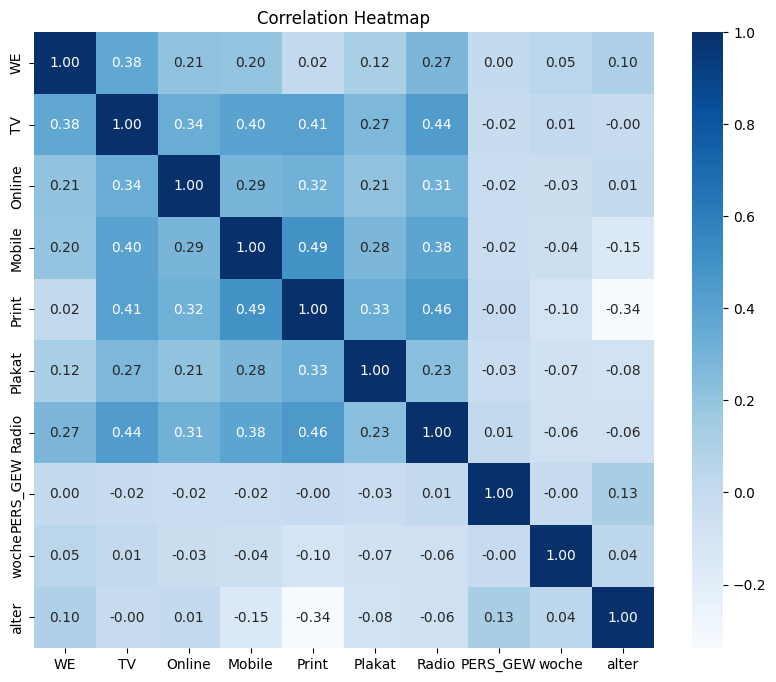

Correlation with 'WE' column:
TV          0.375789
Online      0.208119
Mobile      0.198538
Print       0.015291
Plakat      0.121000
Radio       0.273805
PERS_GEW    0.004486
woche       0.048131
alter       0.097247
dtype: float64


In [26]:
# Calculate correlation matrix
correlation_matrix = df_transformed.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Select features and target column
features = df_transformed.drop(columns=['WE'])
target = df_transformed['WE']

# Calculate correlation between features and target
correlation = features.corrwith(target)

# Print correlation values
print("Correlation with 'WE' column:")
print(correlation)


# Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
# Select the features
feature = df_transformed.iloc[:, 1:]

In [29]:
feature.head()

,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,alter
1:11,-0.133240,-0.151517,-0.403829,-1.314041,-0.272767,-0.401543,0.637758,40,0.266650
1:13,-0.348140,-0.338975,-0.403829,-1.314041,-0.272767,-0.327585,-0.589323,40,0.992763
1:14,-0.498571,-0.214003,-0.403829,-1.314041,-0.272767,-0.327585,-0.269215,40,2.081934
1:15,-0.541551,-0.401462,-0.403829,-1.314041,-0.272767,-0.290606,-0.909431,40,1.597858
1:16,-0.197710,-0.401462,-0.403829,-1.314041,-0.272767,-0.327585,-0.194523,40,-0.096407


**Regression Task 1**

The first task deals with analyzing the magnitude and the direction of the relationship Age (alter), TV, Online, Radio, Mobile, Plakat, Print have with Income ('PERS_GEW')


In [30]:
columns_to_drop = ['PERS_GEW', 'woche']
features_for_task1 = feature.drop(columns=columns_to_drop)
target = features['PERS_GEW']

In [31]:
features_for_task1

,TV,Online,Mobile,Print,Plakat,Radio,alter
1:11,-0.133240,-0.151517,-0.403829,-1.314041,-0.272767,-0.401543,0.266650
1:13,-0.348140,-0.338975,-0.403829,-1.314041,-0.272767,-0.327585,0.992763
1:14,-0.498571,-0.214003,-0.403829,-1.314041,-0.272767,-0.327585,2.081934
1:15,-0.541551,-0.401462,-0.403829,-1.314041,-0.272767,-0.290606,1.597858
1:16,-0.197710,-0.401462,-0.403829,-1.314041,-0.272767,-0.327585,-0.096407
...,...,...,...,...,...,...,...
2:36200,-0.541551,-0.370218,-0.293949,0.057879,-0.199447,-0.401543,0.690216
2:36201,1.886825,-0.338975,-0.239009,1.429799,-0.126128,2.113035,0.629706
2:36202,2.402586,-0.338975,-0.239009,1.429799,-0.126128,-0.364564,0.569197
2:36203,-0.541551,-0.370218,-0.293949,0.057879,-0.199447,-0.401543,0.811235


In [32]:
target.values

array([ 0.63775793, -0.58932334, -0.26921518, ..., -0.26921518,
        1.44869859,  0.29630923])

In [33]:
# Split the data as training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_task1, target,
                                                    test_size=0.20, random_state=42)

In [34]:
print(f"Shape of the training set - Feature:{X_train.shape}, Label:{y_train.shape}")
print(f"Shape of the test set - Feature:{X_test.shape}, Label:{y_test.shape}")

Shape of the training set - Feature:(41205, 7), Label:(41205,)
Shape of the test set - Feature:(10302, 7), Label:(10302,)


In [35]:
# Set the regressor
regressor = RandomForestRegressor()

# Train the regressor
regressor.fit(X_train, y_train)

# Get the predictions
y_pred = regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.978392318727591


In [36]:
importances = regressor.feature_importances_
importances

array([0.25038194, 0.15699899, 0.09291997, 0.02061044, 0.04228375,
       0.14168825, 0.29511666])

In [37]:
feature_names = []
for col_names in features_for_task1.columns:
  feature_names.append(col_names)

feature_names

['TV', 'Online', 'Mobile', 'Print', 'Plakat', 'Radio', 'alter']

In [38]:
# Round coefficients to 4 decimal places
import numpy as np
coefficients_rounded = np.round(importances, decimals=4)

# Convert coefficients to a human-readable format
coefficients_readable = ['{:.4f}'.format(coef) for coef in coefficients_rounded]


regression_dict = {key: value for key, value in zip(features_for_task1, coefficients_readable)}
regression_dict = {k: v for k, v in sorted(regression_dict.items(), key=lambda item: item[1], reverse=True)}
regression_dict = {key: float(value) for key, value in regression_dict.items()}

In [ ]:
regression_dict

{'alter': 0.2965,
 'TV': 0.2512,
 'Online': 0.157,
 'Radio': 0.141,
 'Mobile': 0.0924,
 'Plakat': 0.0409,
 'Print': 0.0209}

The dependent variables exhibit a positive correlation with income, suggesting that higher values of these variables coincide with higher income levels. Specifically, as consumers age, their income tends to increase. Additionally, it is advisable for O2 to prioritize investment in television and online media channels to effectively reach affluent consumers.

Regression Task 2

The second regression task delves into uncovering the relationship between different all the feautures and the target variable advertisement recall

In [58]:
feature_linear_reg = df_transformed.iloc[:, 1:]

In [60]:
feature_linear_reg.head()

,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,alter
1:11,-0.133240,-0.151517,-0.403829,-1.314041,-0.272767,-0.401543,0.637758,40,0.266650
1:13,-0.348140,-0.338975,-0.403829,-1.314041,-0.272767,-0.327585,-0.589323,40,0.992763
1:14,-0.498571,-0.214003,-0.403829,-1.314041,-0.272767,-0.327585,-0.269215,40,2.081934
1:15,-0.541551,-0.401462,-0.403829,-1.314041,-0.272767,-0.290606,-0.909431,40,1.597858
1:16,-0.197710,-0.401462,-0.403829,-1.314041,-0.272767,-0.327585,-0.194523,40,-0.096407


In [61]:
label_linear_reg = df_transformed['WE']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_linear_reg, label_linear_reg, test_size=0.2, random_state=42)

In [63]:
len(X_train), len(X_test), len(y_train), len(y_test)

(41205, 10302, 41205, 10302)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [65]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)


In [66]:
# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.14754374416255048


In [67]:
coefficients = model.coef_

# Print the coefficients
print("Coefficients:", coefficients)

Coefficients: [ 0.14218105  0.03883361  0.04539491 -0.12359428  0.01716399  0.08146525
  0.00418957  0.00068346  0.01292928]


In [68]:
feature_names_reg = []
for names in feature_linear_reg.columns:
  feature_names_reg.append(names)

In [69]:
feature_names_reg

['TV',
 'Online',
 'Mobile',
 'Print',
 'Plakat',
 'Radio',
 'PERS_GEW',
 'woche',
 'alter']

In [71]:
# Round coefficients to 4 decimal places
import numpy as np
coefficients_rounded = np.round(importances, decimals=4)

# Convert coefficients to a human-readable format
coefficients_readable = ['{:.4f}'.format(coef) for coef in coefficients]


regression_dict = {key: value for key, value in zip(feature_names_reg, coefficients_readable)}
regression_dict = {k: v for k, v in sorted(regression_dict.items(), key=lambda item: item[1], reverse=True)}
regression_dict = {key: float(value) for key, value in regression_dict.items()}

In [73]:
regression_dict

{'TV': 0.1422,
 'Radio': 0.0815,
 'Mobile': 0.0454,
 'Online': 0.0388,
 'Plakat': 0.0172,
 'alter': 0.0129,
 'PERS_GEW': 0.0042,
 'woche': 0.0007,
 'Print': -0.1236}

# Feature Selection and Classification using Random Forest

The research conducted by Genuer et al. (2010) underscores the use of Random Forest for feature selection. We can adopt a similar approach in this context to determine the significance of features concerning the target variable 'WE'.

In [ ]:
# Set the features and the target
feature = df_transformed.iloc[:,1:]
target = df_transformed.iloc[:,0]

In [ ]:
feature.head()

,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,alter
1:11,-0.133240,-0.151517,-0.403829,-1.314041,-0.272767,-0.401543,0.637758,40,0.266650
1:13,-0.348140,-0.338975,-0.403829,-1.314041,-0.272767,-0.327585,-0.589323,40,0.992763
1:14,-0.498571,-0.214003,-0.403829,-1.314041,-0.272767,-0.327585,-0.269215,40,2.081934
1:15,-0.541551,-0.401462,-0.403829,-1.314041,-0.272767,-0.290606,-0.909431,40,1.597858
1:16,-0.197710,-0.401462,-0.403829,-1.314041,-0.272767,-0.327585,-0.194523,40,-0.096407


In [ ]:
target.values

array([0., 0., 1., ..., 1., 0., 0.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2,
                                                    random_state=42)

In [ ]:
print(f"Shape of the training set - Feature:{X_train.shape}, Label:{y_train.shape}")
print(f"Shape of the test set - Feature:{X_test.shape}, Label:{y_test.shape}")

Shape of the training set - Feature:(41205, 9), Label:(41205,)
Shape of the test set - Feature:(10302, 9), Label:(10302,)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming X_train and y_train are your training features and labels
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)


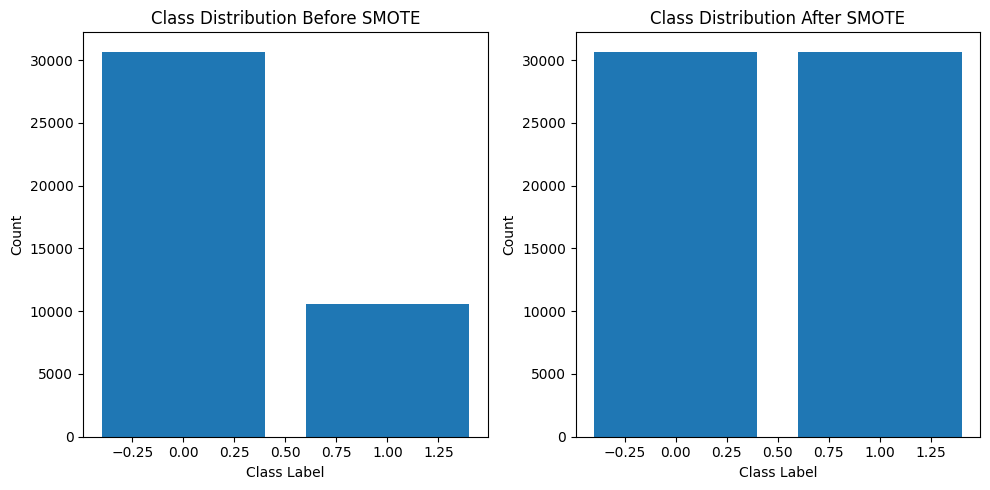

In [ ]:
import matplotlib.pyplot as plt

# Get class labels before and after resampling with SMOTE
class_labels_before = list(Counter(y_train).keys())
class_counts_before = list(Counter(y_train).values())

class_labels_after = list(Counter(y_resampled).keys())
class_counts_after = list(Counter(y_resampled).values())

# Plot class distribution before and after resampling with SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(class_labels_before, class_counts_before)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(class_labels_after, class_counts_after)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Extract feature importances
importances = rf_classifier.feature_importances_

# Get feature names
feature_names = X_train.columns

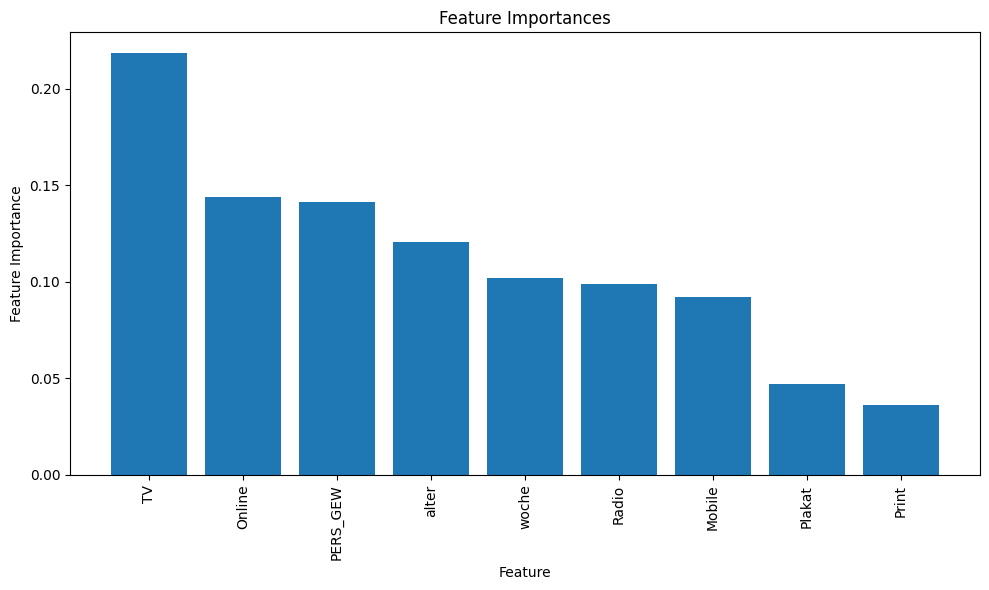

In [ ]:
# Sort feature importances
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importances)
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      7684
         1.0       0.55      0.52      0.53      2618

    accuracy                           0.77     10302
   macro avg       0.70      0.69      0.69     10302
weighted avg       0.77      0.77      0.77     10302



# **Dimension Reduction using PCA**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
df_transformed.head()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,alter
1:11,0.0,-0.133240,-0.151517,-0.403829,-1.314041,-0.272767,-0.401543,0.637758,40,0.266650
1:13,0.0,-0.348140,-0.338975,-0.403829,-1.314041,-0.272767,-0.327585,-0.589323,40,0.992763
1:14,1.0,-0.498571,-0.214003,-0.403829,-1.314041,-0.272767,-0.327585,-0.269215,40,2.081934
1:15,0.0,-0.541551,-0.401462,-0.403829,-1.314041,-0.272767,-0.290606,-0.909431,40,1.597858
1:16,1.0,-0.197710,-0.401462,-0.403829,-1.314041,-0.272767,-0.327585,-0.194523,40,-0.096407


In [ ]:
pca_features = df_transformed.iloc[:,1:]
pca_features.head()

,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,alter
1:11,-0.133240,-0.151517,-0.403829,-1.314041,-0.272767,-0.401543,0.637758,40,0.266650
1:13,-0.348140,-0.338975,-0.403829,-1.314041,-0.272767,-0.327585,-0.589323,40,0.992763
1:14,-0.498571,-0.214003,-0.403829,-1.314041,-0.272767,-0.327585,-0.269215,40,2.081934
1:15,-0.541551,-0.401462,-0.403829,-1.314041,-0.272767,-0.290606,-0.909431,40,1.597858
1:16,-0.197710,-0.401462,-0.403829,-1.314041,-0.272767,-0.327585,-0.194523,40,-0.096407


In [ ]:
# Apply PCA with 4 components
pca = PCA(n_components=4)

# Transform the data into principal components
principal_components = pca.fit_transform(pca_features)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.98714713 0.00446925 0.00188928 0.00153643]


In [ ]:
principal_df.head()

,PC1,PC2,PC3,PC4
0,-0.934855,-1.213257,0.683248,-0.163654
1,-0.933598,-1.415196,0.512437,1.039699
2,-0.932040,-1.611759,1.489959,1.184262
3,-0.932656,-1.586864,0.748117,1.480593
4,-0.935274,-1.216624,-0.081321,0.316507


After feature extraction with PCA, 9 features have been reduced into 4 four features.